In [20]:
# Carrega bibliotecas necessárias
%run '~/git/Bibliotecas.ipynb'

In [21]:
i_f_r_pa=pd.read_csv('~/git/Importacao-por-SH-e-Municipio/temp/i_f_r_pa.csv')
i_f_r_pa.head(1)

,Ano,Mês,Município,Quilograma Líquido,Valor FOB (US$)
0,1997,1,Poços de Caldas,500000,49700


In [22]:
i_f_r_pa=pd.concat([i_f_r_pa[['Ano','Mês','Município']],(i_f_r_pa[['Quilograma Líquido','Valor FOB (US$)']]/10**6).rename(columns={'Quilograma Líquido':'KT','Valor FOB (US$)':'miFOB'})],axis=1)

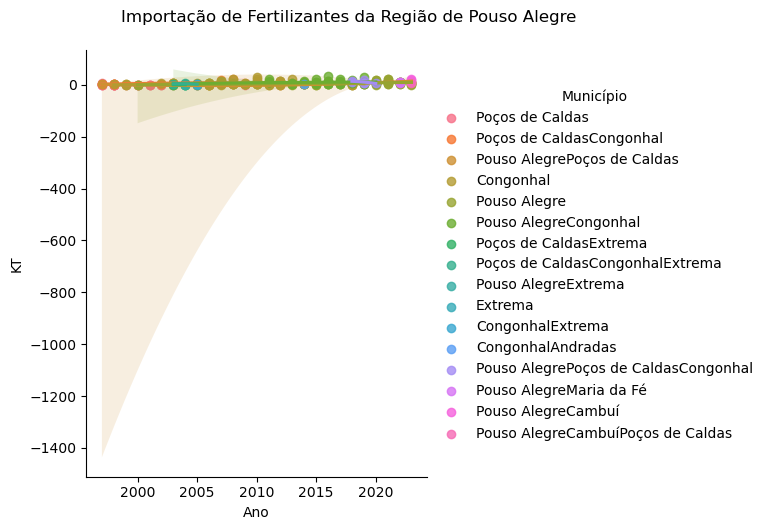

In [23]:
sns.lmplot(data=i_f_r_pa,x='Ano',y='KT',hue='Município',order=2)\
.fig.suptitle('Importação de Fertilizantes da Região de Pouso Alegre',y=1.05)
plt.show()

In [24]:
print('\nPodemos verificar no gráfico acima que o município de Pouso Alegre dominou\n\
completamente os volumes importados da região.\
\n\nDessa forma, o estudo proseguirá não mais considerando segmentações por\n\
município e sim por região totalizada.\n\n')
print('\n\n\nPrevisão de Importação da Região de Pouso Alegre\n\n')
print('Regressão Linear(RL)')


Podemos verificar no gráfico acima que o município de Pouso Alegre dominou
completamente os volumes importados da região.

Dessa forma, o estudo proseguirá não mais considerando segmentações por
município e sim por região totalizada.





Previsão de Importação da Região de Pouso Alegre


Regressão Linear(RL)


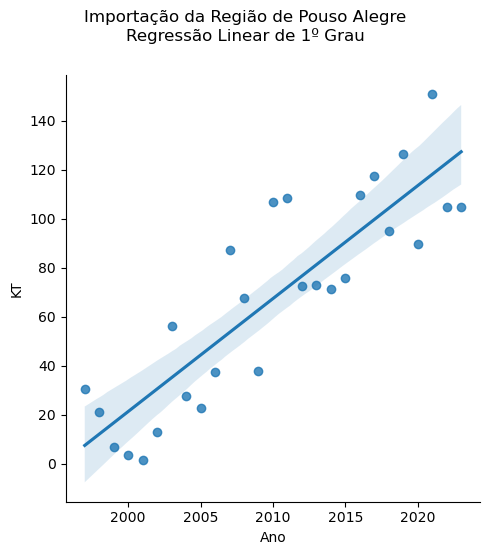

In [25]:
i_f_r_pa=i_f_r_pa.groupby('Ano').KT.sum().reset_index()

sns.lmplot(data=i_f_r_pa,x='Ano',y='KT',order=1)\
.fig.suptitle('Importação da Região de Pouso Alegre\nRegressão Linear de 1º Grau',y=1.1)
plt.show()

In [26]:
print('\nVisualmente, por esse modelo acima, a previsão para 2024 é de aproximadamente\n\
140 mil/toneladas.')


Visualmente, por esse modelo acima, a previsão para 2024 é de aproximadamente
140 mil/toneladas.


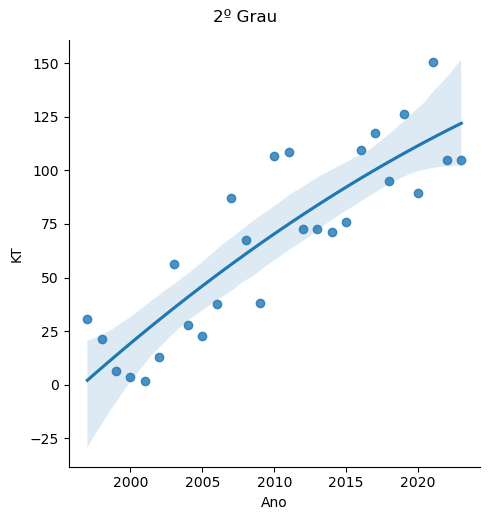

In [27]:
sns.lmplot(data=i_f_r_pa,x='Ano',y='KT',order=2)\
.fig.suptitle('2º Grau',y=1.03)
plt.show()

In [28]:
print('\nVisualmente, por esse modelo de 2º grau acima, a previsão para 2024\n\
é de aproximadamente 130 mil/toneladas.')
print('\nJá o modelo de previsão com base em polinômio de 3º grau (abaixo), que não é\n\
facilmente aceito por ser considerado "overfitting", prevê importação aproximada \n\
de 100 mil toneladas para o ano de 2024.')


Visualmente, por esse modelo de 2º grau acima, a previsão para 2024
é de aproximadamente 130 mil/toneladas.

Já o modelo de previsão com base em polinômio de 3º grau (abaixo), que não é
facilmente aceito por ser considerado "overfitting", prevê importação aproximada 
de 100 mil toneladas para o ano de 2024.


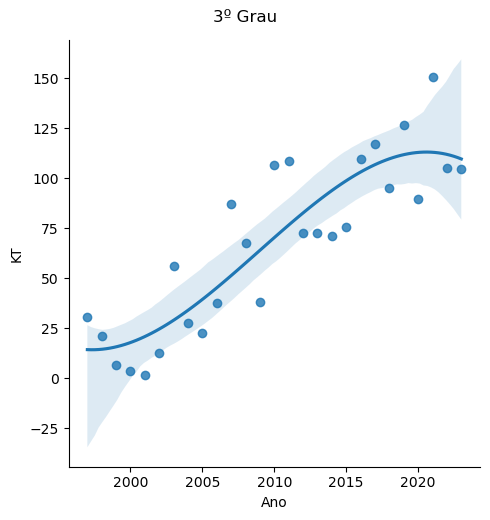

In [29]:
sns.lmplot(data=i_f_r_pa,x='Ano',y='KT',order=3)\
.fig.suptitle('3º Grau',y=1.03)
plt.show()

In [30]:
q=pd.DataFrame()
for ano in i_f_r_pa.Ano.unique():
    i_f_r_pa_t=i_f_r_pa[i_f_r_pa.Ano<=ano]
    if len(i_f_r_pa_t)>=5:
        X_train=i_f_r_pa_t[['Ano']]
        y_train=i_f_r_pa_t.KT
        X_test=pd.DataFrame({'Ano':[i_f_r_pa_t['Ano'].max()+1]})
        RFR.fit(X_train,y_train)
        LR.fit(X_train,y_train)
        
        y_pred_RFR=RFR.predict(X_test)
        y_pred_LR=LR.predict(X_test)
        
        pred_RFR=pd.DataFrame({'Ano':X_test.values[0],'KT':y_pred_RFR}).assign(tipo='previsão_RFR')
        pred_LR=pd.DataFrame({'Ano':X_test.values[0],'KT':y_pred_LR}).assign(tipo='previsão_LR')
        
        q=pd.concat([q,pred_RFR,pred_LR])
q

,Ano,KT,tipo
0,2002,2.547719,previsão_RFR
0,2002,-9.860869,previsão_LR
0,2003,9.262343,previsão_RFR
0,2003,-2.284330,previsão_LR
0,2004,43.367842,previsão_RFR
0,2004,26.834610,previsão_LR
0,2005,35.666936,previsão_RFR
0,2005,29.261863,previsão_LR
0,2006,27.170595,previsão_RFR
0,2006,28.325574,previsão_LR


In [31]:
q.loc[q.KT<0,'KT']=0

In [32]:
q=pd.concat([q,i_f_r_pa.assign(tipo='real')]).sort_values('tipo',ascending=False)

In [33]:
print('\n\n\nRegressão por Floresta Randômica (RFR)\n\n\
A Regressão por Floresta Randômica é classificada como "aprendizado de máquinas"\n\
e serve aqui de exemplo dessa tecnologia aplicada ao mercado de fertilizantes.\n\n')




Regressão por Floresta Randômica (RFR)

A Regressão por Floresta Randômica é classificada como "aprendizado de máquinas"
e serve aqui de exemplo dessa tecnologia aplicada ao mercado de fertilizantes.




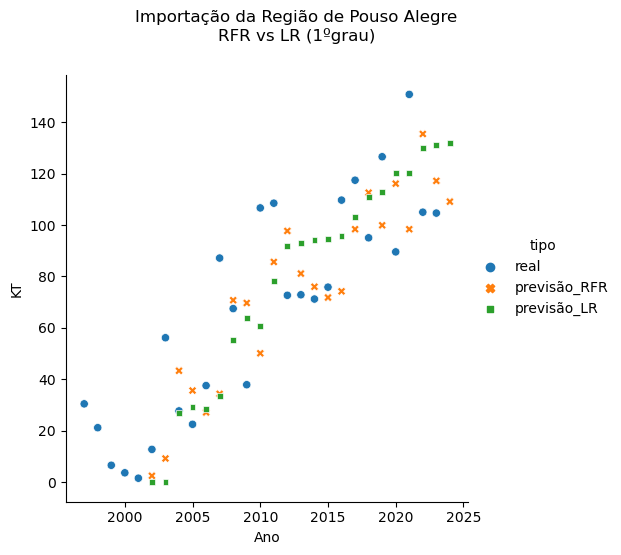

In [34]:
sns.relplot(data=q,x='Ano',y='KT',hue='tipo',style='tipo').fig.suptitle('Importação da Região de Pouso Alegre\nRFR vs LR (1ºgrau)',y=1.1)
plt.show()

In [35]:
r=q.sort_values(by='Ano')
r=r[r.Ano!=2024]
r=r[r.Ano>r.Ano.min()+10]

r1=r[r.tipo=='real'].rename(columns={'KT':'KT_real'})
r2=r[r.tipo=='previsão_RFR'].rename(columns={'KT':'KT_RFR'})
r3=r[r.tipo=='previsão_LR'].rename(columns={'KT':'KT_LR'})
r4=r1.merge(r2,on='Ano').merge(r3,on='Ano')

r4['erro_percent_RFR']=round(100*(r4.KT_RFR-r4.KT_real)/r4.KT_real)

r4['erro_percent_LR']=round(100*(r4.KT_LR-r4.KT_real)/r4.KT_real)

print('Regressão Linear:')
print(f"Média do Erro Percentual:\
{round(r4.erro_percent_LR.mean())}%")

print(f"Desvio Padrão do Erro Percentual:\
{round(r4.erro_percent_LR.std())}%")

print()
print('Random Forest:')
print(f"Média do Erro Percentual: {round(r4.erro_percent_RFR.mean())}%")
print(f"Desvio Padrão do Erro Percentual: {round(r4.erro_percent_RFR.std())}%")
print('\nNessa primeira tentativa de previsão, não parece ter havido \n\
diferença significativa entre os dois métodos de regressão testados.\n\n\n\n')

Regressão Linear:
Média do Erro Percentual:8%
Desvio Padrão do Erro Percentual:29%

Random Forest:
Média do Erro Percentual: 3%
Desvio Padrão do Erro Percentual: 33%

Nessa primeira tentativa de previsão, não parece ter havido 
diferença significativa entre os dois métodos de regressão testados.




